In [1]:
%cd /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5 

import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import yaml
import os
import glob as glob
import requests
import cv2

%matplotlib inline

/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5


In [2]:
data_path = '/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml'

In [3]:
def rename_df_cols(df):
    old_cols = list(df.columns)
    new_cols = ['epoch', 'train/box_loss', 'train/obj_loss',
       'train/cls_loss', 'metrics/precision', 'metrics/recall',
       'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss',
       'val/obj_loss', 'val/cls_loss', '/lr0', 'x/lr1', 'x/lr2']
    aux = dict(zip(old_cols, new_cols))
    df = df.rename(columns=aux)
    return df

def plot_losses(df_results):
    df_results.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Cls_loss")
    #plt.show()
    

def modify_lr_hyperparam(hyperparam_file_path:str, lr_new:float):
    with open(hyperparam_file_path, 'r') as f:
        yaml_dict = yaml.safe_load(f)
        
        # Modify the 'lr' value in the sixth line
        yaml_dict['lr0'] = lr_new
        #print(yaml_dict['lr0'])
        
    # Write the modified YAML back to the file
    with open(hyperparam_file_path, 'w') as f:
        yaml.dump(yaml_dict, f)
        
        
"""degrees: 0.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.9  # image scale (+/- gain)
shear: 0.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 1.0  # image mosaic (probability)
mixup: 0.1  # image mixup (probability)
"""

def hyperparam_tuning(hyperparam_file_path:str, lr_new=0.1, degrees_new=0.0, translate_new=0.1, scale_new=0.9, shear_new=0.0, perspective_new=0.0, 
                      flipud_new=0.0, fliplr_new=0.5, mosaic_new=1.0, mixup_new=0.1):
    
    # Open hyperparamentes file 
    with open(hyperparam_file_path, 'r') as f:
        yaml_dict = yaml.safe_load(f)
        
        # Modify the 'lr' value in the sixth line
        yaml_dict['lr0'] = lr_new
        yaml_dict['degrees'] = degrees_new
        yaml_dict['translate']= translate_new
        yaml_dict['scale']= scale_new
        yaml_dict['shear']= shear_new
        yaml_dict['perspective']= perspective_new
        yaml_dict['flipud']= flipud_new
        yaml_dict['fliplr']= fliplr_new
        yaml_dict['mosaic']= mosaic_new
        yaml_dict['mixup']= mixup_new
        
        
    # Write the modified YAML back to the file
    with open(hyperparam_file_path, 'w') as f:
        yaml.dump(yaml_dict, f)
        

# Function to show validation predictions saved during training.
def show_valid_results(results_model_path, figure_size):
    validation_pred_images = glob.glob(f"{results_model_path}/*_pred.jpg")
    for pred_image in validation_pred_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=figure_size)
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

In [4]:
# Bringing best model from previous experiments
model_name = 'b32_e200_f12_v5m6'
results_V5M6 = rename_df_cols(pd.read_csv(f'Norway/{model_name}/results.csv'))

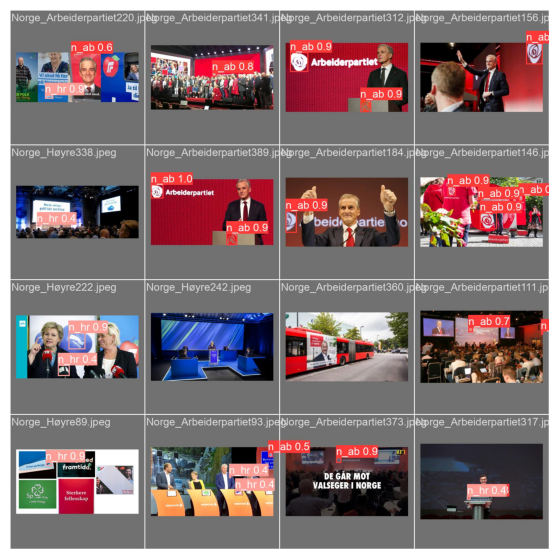

In [5]:
show_valid_results(f'Norway/{model_name}',(10,7))

In [20]:
def run_detection(country_name:str, model_name:str, test_data_path:str):
    model_path = f'{country_name}/{model_name}/weights/best.pt'
    test_folder_path = f'{model_name}_TEST'
    
    print(model_path)
    
    !python detect.py \
    --weights {model_path} \
    --source {test_data_path} \
    --project Norway \
    --name {test_folder_path}

In [21]:
run_detection('Norway',model_name, '/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/images/test/')

Norway/b32_e200_f12_v5m6/weights/best.pt
detect: weights=['Norway/b32_e200_f12_v5m6/weights/best.pt'], source=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=Norway, name=b32_e200_f12_v5m6_TEST, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000, 16125MiB)

Fusing layers... 
Model summary: 276 layers, 35254692 parameters, 0 gradients, 48.9 GFLOPs
image 1/16 /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/images/test/Norge_Arbeiderpartiet102.jpeg: 640x512 1 n_ab, 45.1ms
image 2/16 /zpool/beast-mirror/labour-

In [22]:
def show_test_results(country_name, model_name, figure_size):
    test_path = f'{country_name}/{model_name}_TEST'
    test_images = glob.glob(f"{test_path}/*.jpeg")
    for pred_image in test_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=figure_size)
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

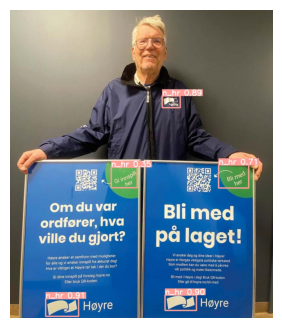

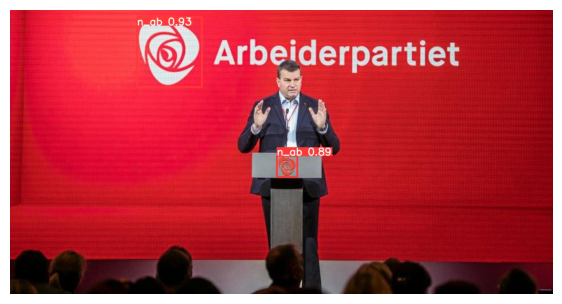

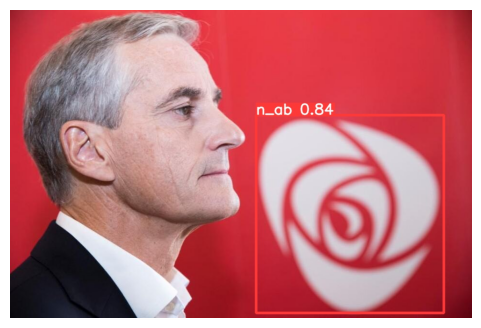

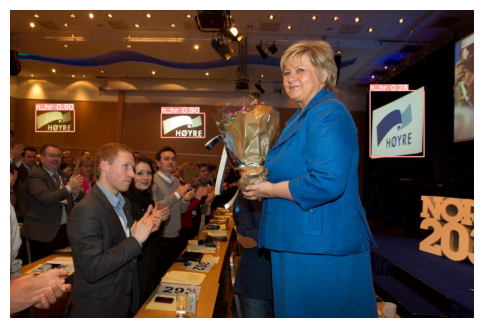

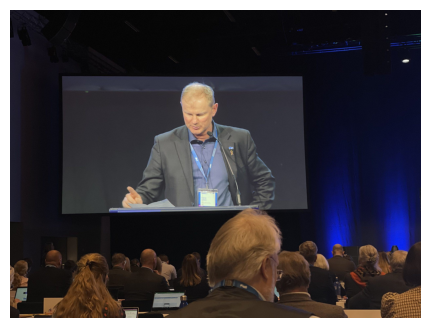

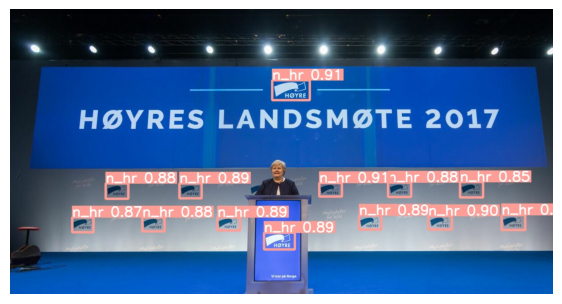

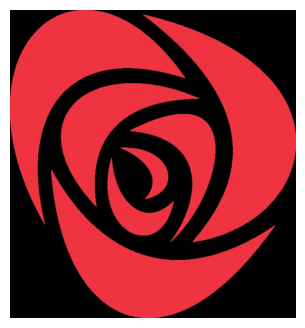

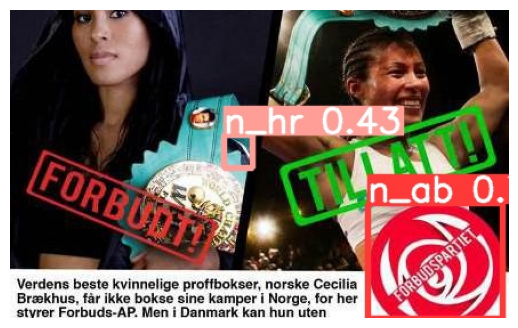

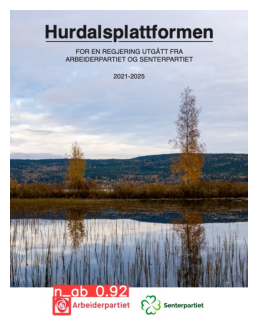

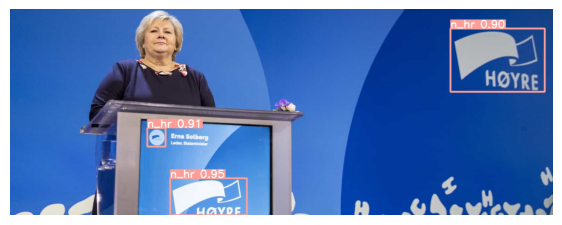

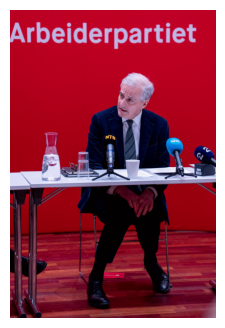

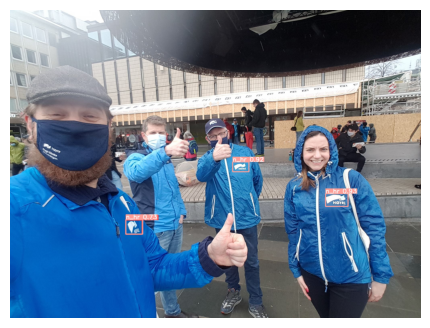

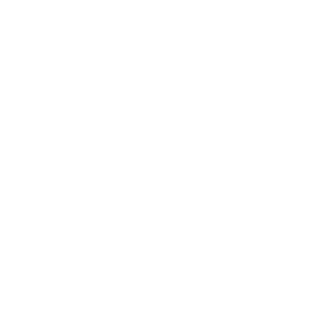

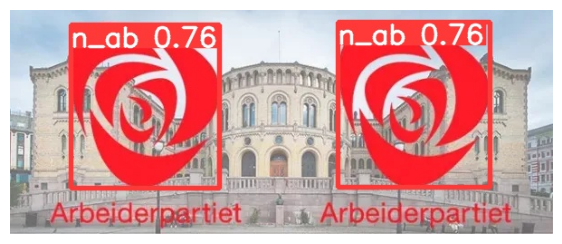

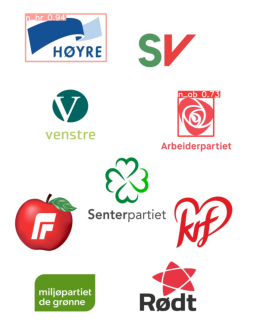

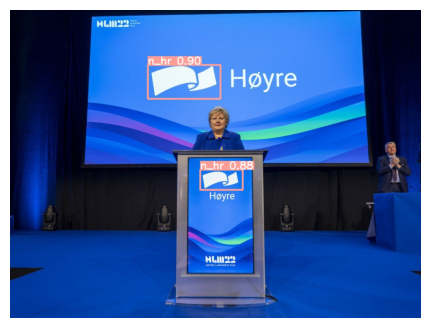

In [23]:
show_test_results('Norway',model_name,(7,4))